Stored patterns: 


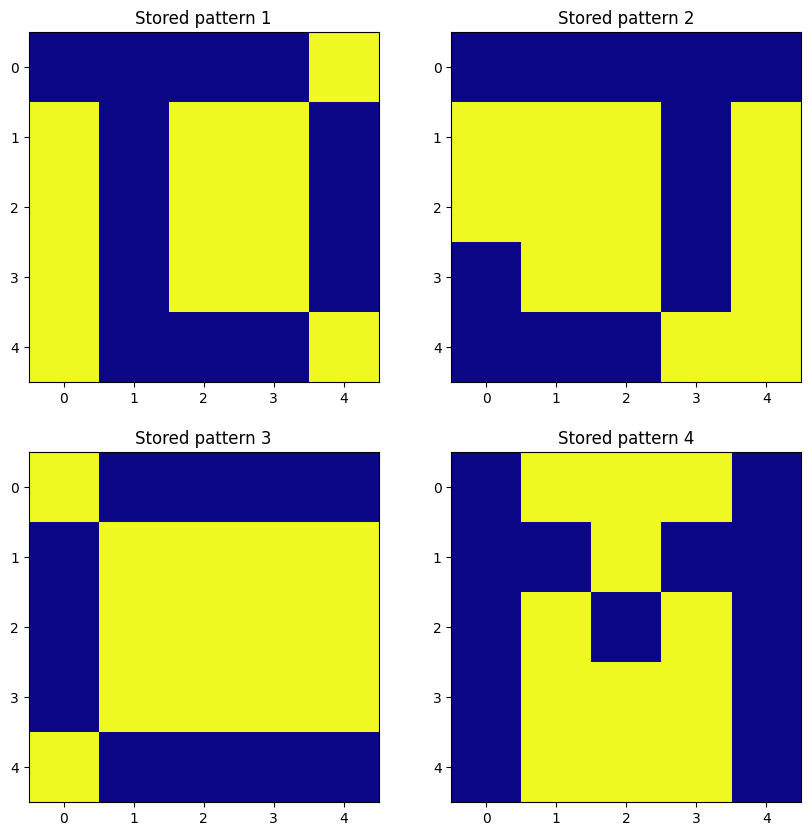

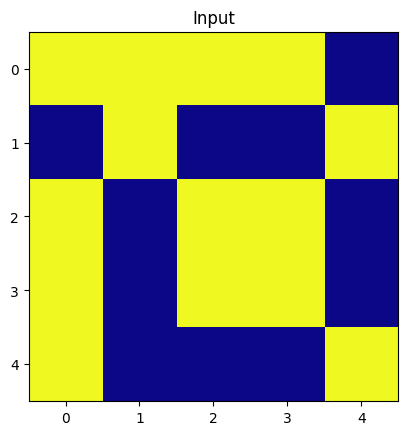

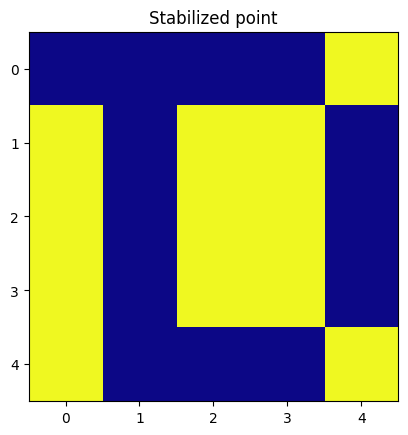

Tolerable error for stored pattern 1: 0 bits
Tolerable error for stored pattern 2: 13 bits
Tolerable error for stored pattern 3: 12 bits
Tolerable error for stored pattern 4: 16 bits


In [ ]:
# Problem 1

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the Hamming distance between two patterns
def calculate_hamming_distance(pattern1, pattern2):
    return np.sum(pattern1 != pattern2)

# Define the stored patterns
patterns = np.array([[1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1],
                     [1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1],
                     [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1],
                     [1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1]])

# Calculate the weight matrix
weight_matrix = np.dot(patterns.T, patterns)
np.fill_diagonal(weight_matrix, 0)
weight_matrix = weight_matrix.astype(float) / patterns.shape[0]

# Modify the initial pattern
initial_pattern = patterns[0].copy()
initial_pattern[0:10] *= -1

# Print the stored patterns
print('Stored patterns: ')

# Plot the stored patterns
plt.figure(figsize=(10, 10))
for i in range(len(patterns)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(-patterns[i].reshape(5, 5), cmap='plasma')
    plt.title(f'Stored pattern {i+1}')

plt.show()

# Plot the initial input pattern
plt.imshow(-initial_pattern.reshape(5, 5), cmap='plasma')
plt.title('Input')
plt.show()

# Update the pattern until convergence or error is below a threshold
current_pattern = initial_pattern.copy()
error = 10
iterations = 0

while error > 1:
    updated_pattern = np.sign(np.dot(weight_matrix, current_pattern))
    error = np.linalg.norm(updated_pattern - current_pattern)
    current_pattern = updated_pattern.copy()
    iterations += 1

# Plot the stabilized pattern
plt.imshow(-current_pattern.reshape(5, 5), cmap='plasma')
plt.title('Stabilized point')
plt.show()

# Calculate and print the Hamming distance for each stored pattern
for i, stored_pattern in enumerate(patterns):
    distance = calculate_hamming_distance(stored_pattern, current_pattern)
    print(f'Tolerable error for stored pattern {i+1}: {distance} bits')


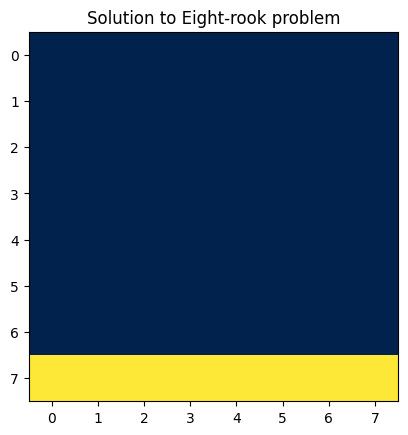

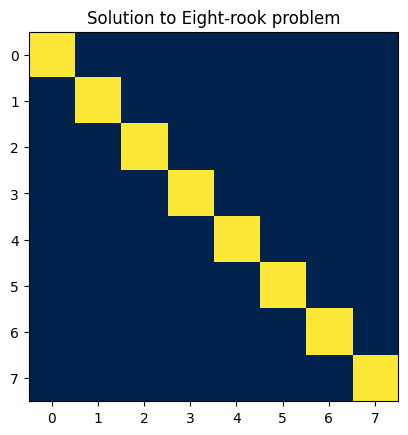

In [ ]:
# Problem 2

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the energy of a state in the Hopfield network
def calculate_energy(state, weight_matrix, threshold):
    return -0.5 * np.dot(state.T, np.dot(weight_matrix, state)) + np.dot(threshold, state)

# Function for asynchronous update of the state in the Hopfield network
def asynchronous_update(state, weight_matrix, threshold):
    for i in range(len(state)):
        u = np.dot(weight_matrix[i], state) - threshold[i]
        state[i] = 1 if u >= 0 else 0
    return state

# Function to plot the chessboard solution
def plot_chessboard_solution(state):
    plt.imshow(state.reshape(8, 8), cmap='cividis')  # Changed colormap to 'cividis'
    plt.title('Solution to Eight-rook problem')
    plt.show()

# Initialize weight matrix for Hopfield network
weight_matrix = np.zeros((64, 64))

# Set weights for horizontal and vertical interactions between rooks
for i in range(8):
    for j in range(8):
        for k in range(8):
            weight_matrix[i*8 + j, i*8 + k] = -2
            weight_matrix[i*8 + j, k*8 + j] = -2

# Set diagonal weights to zero
np.fill_diagonal(weight_matrix, 0)

# Initialize threshold values for Hopfield network
threshold = -np.ones(64)

# Initialize initial state for Hopfield network
initial_state = np.zeros(64, dtype=int)
initial_state[56:64] = 1

# Plot initial state of the chessboard
plot_chessboard_solution(initial_state)

# Update the state asynchronously until convergence or maximum iterations reached
max_iterations = 1000
for _ in range(max_iterations):
    new_state = asynchronous_update(initial_state.copy(), weight_matrix, threshold)
    if calculate_energy(new_state, weight_matrix, threshold) > calculate_energy(initial_state, weight_matrix, threshold):
        break
    initial_state = new_state

# Plot the final state of the chessboard
plot_chessboard_solution(initial_state)


Optimal Path Indices: [6, 8, 0, -9, 7, -2, -1, -4, -5, -3]


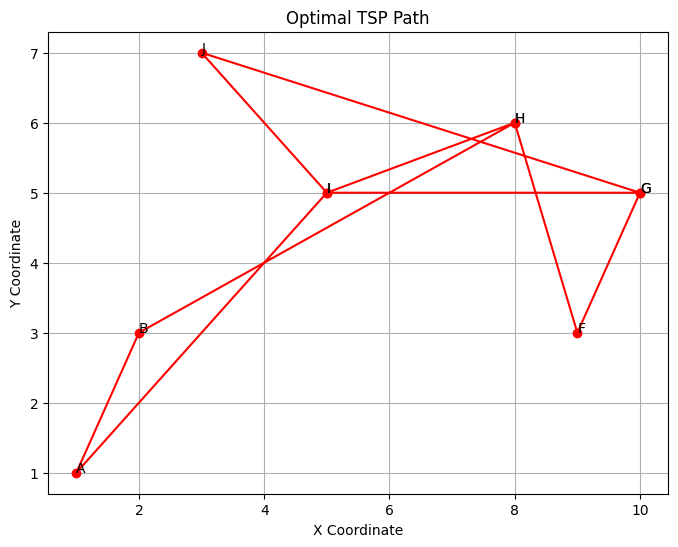

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cities and their coordinates
city_coordinates = {
    'A': (1, 1),
    'B': (2, 3),
    'C': (4, 2),
    'D': (6, 4),
    'E': (7, 1),
    'F': (9, 3),
    'G': (10, 5),
    'H': (8, 6),
    'I': (5, 5),
    'J': (3, 7)
}

# Calculate distances between cities
def calculate_distance(coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Calculate distance matrix
num_cities = len(city_coordinates)
distance_matrix = np.zeros((num_cities, num_cities))
for i, (city1, coord1) in enumerate(city_coordinates.items()):
    for j, (city2, coord2) in enumerate(city_coordinates.items()):
        if i != j:
            distance_matrix[i][j] = calculate_distance(coord1, coord2)

# Define the energy function for the TSP
def energy_function(path, distance_matrix):
    energy = 0
    for i in range(len(path) - 1):
        energy += distance_matrix[path[i]][path[i + 1]]
    energy += distance_matrix[path[-1]][path[0]]  # Return to the starting city
    return energy

# Initialize the Hopfield network weights
weights_matrix = -distance_matrix

# Solve the TSP using a Hopfield network
def hopfield_tsp(distance_matrix, weights_matrix, max_iterations=1000):
    num_cities = len(distance_matrix)
    path = list(range(num_cities))  # Initial path
    np.random.shuffle(path)  # Shuffle the initial path
    prev_energy = float('inf')
    for _ in range(max_iterations):
        for i in range(num_cities):
            energy_diff = 2 * np.dot(weights_matrix[i], path)
            if energy_diff < 0 or np.random.rand() < np.exp(-energy_diff):
                path[i] *= -1  # Flip the city in the path

        energy = energy_function(path, distance_matrix)
        if energy >= prev_energy:
            break
        prev_energy = energy

    return path

# Solve the TSP
optimal_path = hopfield_tsp(distance_matrix, weights_matrix)
print("Optimal Path Indices:", optimal_path)

# Plot the optimal path
optimal_city_order = [list(city_coordinates.keys())[idx] for idx in optimal_path]
optimal_city_coords = [city_coordinates[city] for city in optimal_city_order]

plt.figure(figsize=(8, 6))
plt.plot([coord[0] for coord in optimal_city_coords], [coord[1] for coord in optimal_city_coords], marker='o', color='red')  # Changed marker color to red
for i, city in enumerate(optimal_city_order):
    plt.text(city_coordinates[city][0], city_coordinates[city][1], city)
plt.title("Optimal TSP Path")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()
